
# Case study on Pre-processing


Do the following on titanic dataset.<br>
1. Load the dataset into python environment<br>
2. Make ‘PassengerId’ as the index column<br>
3. Check the basic details of the dataset<br>
4. Fill in all the missing values present in all the columns in the dataset<br>
5. Check and handle outliers in at least 3 columns in the dataset<br>
6. Do min max scaling on the feature set (Take ‘Survived’ as target)<br>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data set and making PassengerId as index column
df= pd.read_csv('titanic_dataset.csv',index_col = 'PassengerId')

In [3]:
#Check the basic details of the dataset
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
#Exploratory Analysis of Titanic dataset. (For my academic interest!)

In [6]:
#Survived

100 * (df['Survived']==0).sum() / len(df)

61.61616161616162

More than 60% of the passengers didnot survive in this tragedy. 

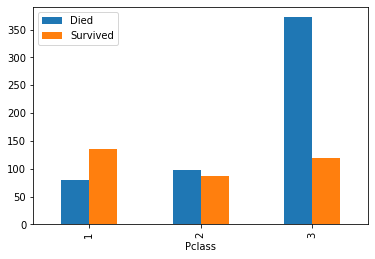

In [7]:
#Pclass - This feature renders the passenger division.
CrosstabResult=pd.crosstab(index=df['Pclass'],columns=df['Survived'])
CrosstabResult.plot.bar()
plt.legend(('Died', 'Survived'), loc='best')

Third Class had the highest number of passengers. They had the least number of survivers. 

64.75869809203142


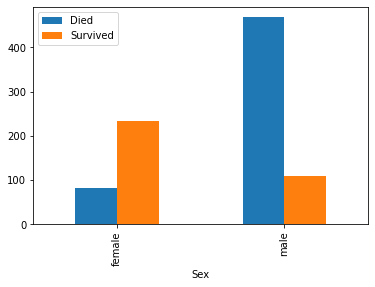

In [8]:
#Sex 
print(100 * (df['Sex']=='male').sum() / len(df))
CrosstabResult=pd.crosstab(index=df['Sex'],columns=df['Survived'])
CrosstabResult.plot.bar()

plt.legend(('Died', 'Survived'), loc='best')

Approximately 65% of the passengers were male while the remaining 35% were female. Nonetheless, the percentage of female survivors was higher than the number of male survivors.

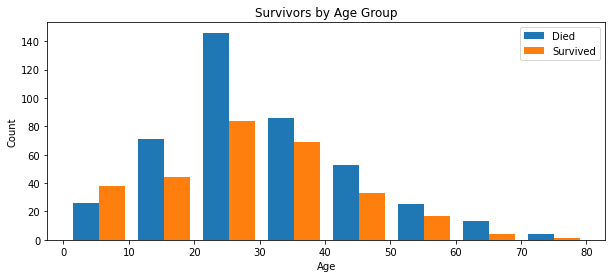

In [10]:
#Age
df1 = df[df['Survived'] == 0]['Age']
df2 = df[df['Survived'] == 1]['Age']

plt.figure(figsize=(10,4))
plt.hist([df1,df2], bins=8)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Clearly, a larger fraction of children under 10 survived than died. Every other age group, the number of casualties
was higher than the number of survivors.
More than 250 people within the age group 20 and 30 were dead as compared to just under 120 people of the same age 
range survived.

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


Text(0, 0.5, 'Count')

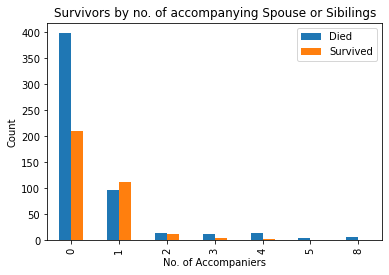

In [11]:
#SibSp - SibSp is the number of siblings or spouse of a person onboard.

CrosstabResult=pd.crosstab(index=df['SibSp'],columns=df['Survived'])
print(CrosstabResult)
CrosstabResult.plot.bar()

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by no. of accompanying Spouse or Sibilings')
plt.xlabel('No. of Accompaniers')
plt.ylabel('Count')

Most of the people traveled alone or with one of their sibling or spouse. The chances of survival dropped drastically if someone traveled with more than 2 siblings or spouse.

Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


Text(0, 0.5, 'Count')

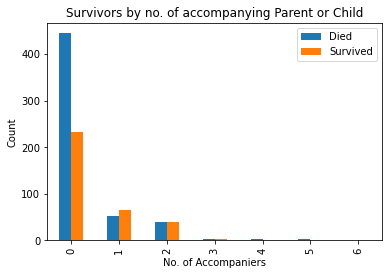

In [12]:
# Parch - This feature contained the number of parents or children each passenger was touring with.

CrosstabResult=pd.crosstab(index=df['Parch'],columns=df['Survived'])
print(CrosstabResult)
CrosstabResult.plot.bar()

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by no. of accompanying Parent or Child')
plt.xlabel('No. of Accompaniers')
plt.ylabel('Count')

Most of the people traveled alone.<br>
The chances of survival dropped drastically if someone traveled with parent or child.

Survived         0    1
Fare_Category          
Low            165   43
Mid            150   67
High_Mid       134  102
High            76  101


Text(0, 0.5, 'Count')

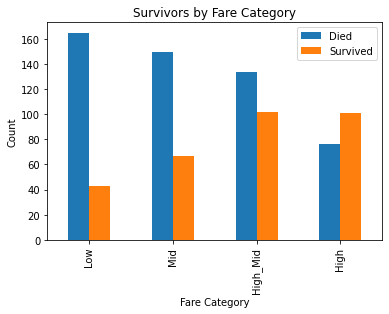

In [13]:
#Fare 

data1=df.copy()
data1['Fare_Category'] = pd.cut(data1['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])

CrosstabResult=pd.crosstab(index=data1['Fare_Category'],columns=data1['Survived'])
print(CrosstabResult)
CrosstabResult.plot.bar()

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Fare Category')
plt.xlabel('Fare Category')
plt.ylabel('Count')

The higher a passenger paid, the higher would be his chances to survive.

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


Text(0, 0.5, 'Count')

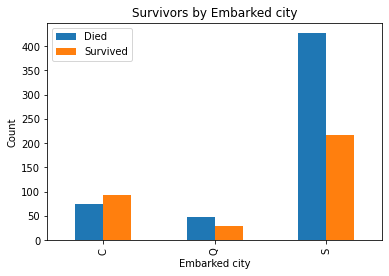

In [14]:
#Embarked
CrosstabResult=pd.crosstab(index=df['Embarked'],columns=df['Survived'])
print(CrosstabResult)
CrosstabResult.plot.bar()

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Embarked city')
plt.xlabel('Embarked city')
plt.ylabel('Count')

Most of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded 
from Queenstown. <br>
People who boarded from Cherbourg had a higher chance of survival than people who boarded from 
Southampton or Queenstown. <br>

In [15]:
#Checking for null values in dataset 
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age,Cabin and Embarked columns have missing values. Cabin and Embarked are categorical variables.  

<AxesSubplot:ylabel='PassengerId'>

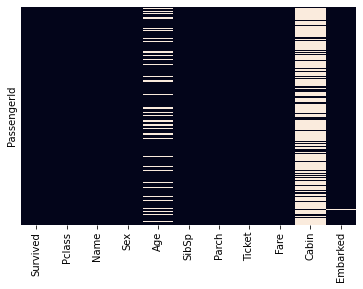

In [16]:
#visualizing missing values 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [17]:
#Filling the missing values in Age column
df['Age'].mean()

29.69911764705882

In [18]:
df['Age'].median()

28.0

Mean is more than median, indicating right Skewed data. 

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

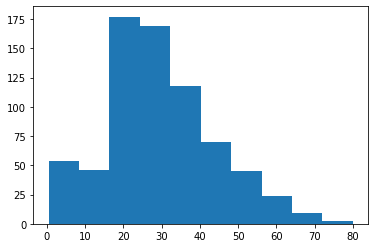

In [19]:
plt.hist(df['Age'])

Age column is right skewed, Therefore using median to fill the null values. 

In [20]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [21]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
#filling the missing values in Embarked column with mode. 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [23]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [24]:
#Since the number of missing values in Cabin column is fairly large,finding the percentage of missing on total.
100 * df['Cabin'].isna().sum() / len(df)


77.10437710437711

We can fill the missing values with mode. However,since almost 77% of the data is missing,it doesn’t make sense
to impute with the most frequent class. Instead, let us create a separate category for missing values like “Unknown”

In [25]:
df['Cabin']= df['Cabin'].fillna('Unknown')
df['Cabin'][:10]

PassengerId
1     Unknown
2         C85
3     Unknown
4        C123
5     Unknown
6     Unknown
7         E46
8     Unknown
9     Unknown
10    Unknown
Name: Cabin, dtype: object

In [26]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Missing values present in all columns are filled in the dataset. 

# Detecting Outliers

<AxesSubplot:>

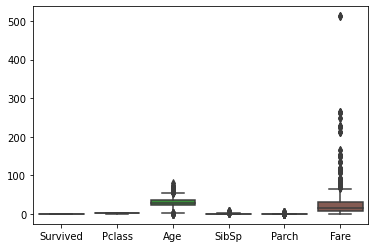

In [27]:
#5.Check and handle outliers in at least 3 columns in the dataset
# Outlier detection - Visualization using boxplots

sns.boxplot(data=df)



<AxesSubplot:xlabel='Age'>

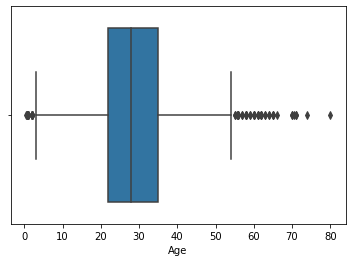

In [28]:
#Detecting outliers for Age Column
#Visualization using boxplots
sns.boxplot(x=df['Age'])

In [29]:
#IQR - Measure of statistical dispersion. Calculated as the difference between 75th and 25th percentiles.
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)

IQR=Q3-Q1
print('Q1 = ' ,Q1)
print('Q3 = ' ,Q3)

low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print('Lower limit = ',Q1 - 1.5*IQR)
print('Upper Limit =', Q3 + 1.5*IQR)


Q1 =  22.0
Q3 =  35.0
Lower limit =  2.5
Upper Limit = 54.5


In [30]:
Age_outliers = df[ (df['Age'] < (Q1 - 1.5*IQR)) | (df['Age'] > (Q3 + 1.5*IQR))]

Age_outliers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,Unknown,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,Unknown,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Unknown,Q
34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,Unknown,C
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,S
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,Unknown,S


In [31]:
#Trimming - Create an index for all outlier data points and drop the index values.
index1 = Age_outliers.index
df.drop(index1,inplace=True)

<AxesSubplot:xlabel='Age'>

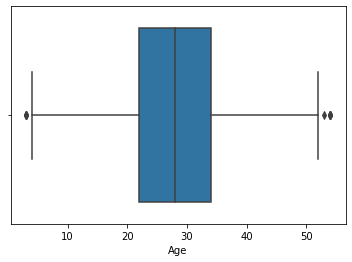

In [32]:
#Visualizing Age after trimming the ouliers. 
sns.boxplot(x=df['Age'])


<AxesSubplot:xlabel='Fare'>

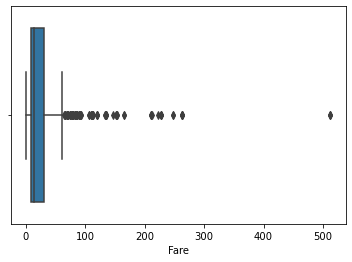

In [33]:
#Detecting outliers for Fare Column
#Visualization using boxplots
sns.boxplot(x=df['Fare'])

In [34]:
#IQR - Measure of statistical dispersion. Calculated as the difference between 75th and 25th percentiles.
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)

IQR=Q3-Q1
print('Q1 = ' ,Q1)
print('Q3 = ' ,Q3)

low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print('Lower limit = ',Q1 - 1.5*IQR)
print('Upper Limit =', Q3 + 1.5*IQR)

Q1 =  7.8958
Q3 =  30.0708
Lower limit =  -25.366699999999994
Upper Limit = 63.333299999999994


In [35]:
Fare_outliers = df[ (df['Fare'] < (Q1 - 1.5*IQR)) | (df['Fare'] > (Q3 + 1.5*IQR))]

Fare_outliers.shape

(107, 11)

In [36]:
#Trimming - Create an index for all outlier data points and drop the index values.
index2 = Fare_outliers.index
df.drop(index2,inplace=True)

<AxesSubplot:xlabel='Fare'>

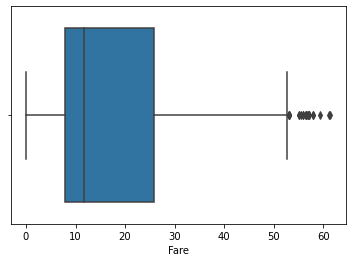

In [37]:
#Visualizing Fare after trimming the outliers. 
sns.boxplot(x=df['Fare'])

<AxesSubplot:xlabel='SibSp'>

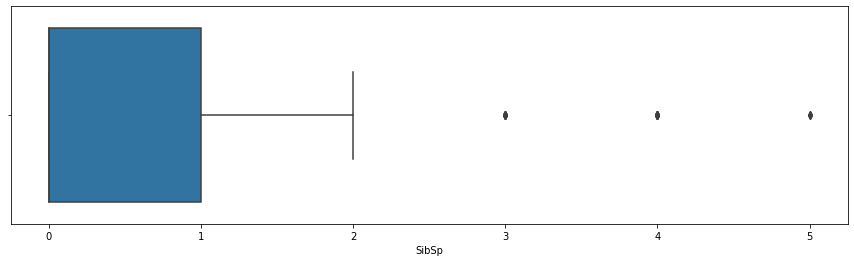

In [38]:
#Detecting outliers for SibSp Column
#Visualization using boxplots
plt.figure(figsize = (15,4))
sns.boxplot(x=df['SibSp'])

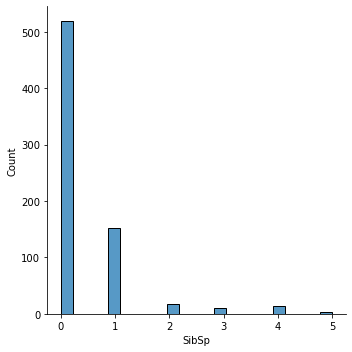

In [39]:
#Visualization using histogram
sns.displot(x=df['SibSp'])

In [40]:
#Checking for Skeweness 
print('Skewness value of SibSp: ',df['SibSp'].skew())

Skewness value of SibSp:  2.881521046073799


In [41]:
#IQR - Measure of statistical dispersion. Calculated as the difference between 75th and 25th percentiles.
Q1=df['SibSp'].quantile(0.25)
Q3=df['SibSp'].quantile(0.75)

IQR=Q3-Q1
print('Q1 = ' ,Q1)
print('Q3 = ' ,Q3)

low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print('Lower limit = ',Q1 - 1.5*IQR)
print('Upper Limit =', Q3 + 1.5*IQR)

Q1 =  0.0
Q3 =  1.0
Lower limit =  -1.5
Upper Limit = 2.5


In [42]:
SibSp_outliers = df[ (df['SibSp'] < (Q1 - 1.5*IQR)) | (df['SibSp'] > (Q3 + 1.5*IQR))]

SibSp_outliers.shape

(29, 11)

In [43]:
#Trimming - Create an index for all outlier data points and drop the index values.
index3 = SibSp_outliers.index
df.drop(index3,inplace=True)

<AxesSubplot:xlabel='SibSp'>

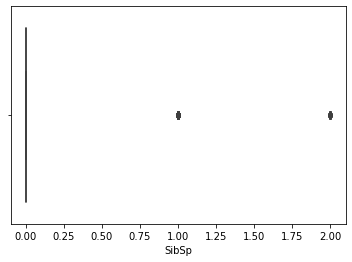

In [44]:
#Visualizing SibSp after trimming the outliers. 
sns.boxplot(x=df['SibSp'])

<AxesSubplot:>

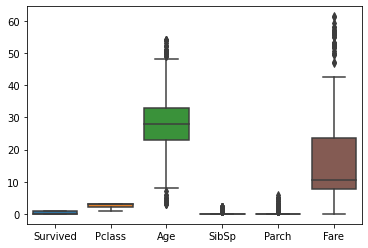

In [45]:
sns.boxplot(data=df) #visualization after outliers are removed. 

# Min Max scaling on the feature set (Taking ‘Survived’ as target)

In [68]:
x = df.drop(['Survived','Name','Ticket','Cabin'], axis=1) #Dropping irrelevant columns Name, Ticket and cabin
y = df['Survived']

In [69]:
x = pd.get_dummies(x) #One hot encoding, Sex and Embarked. 

In [70]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.493469,28.711176,0.272859,0.269956,16.631246,0.312046,0.687954,0.150943,0.098694,0.750363
std,0.723586,9.545220,0.501020,0.754625,13.092563,0.463665,0.463665,0.358254,0.298467,0.433117
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,28.000000,0.000000,0.000000,10.500000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,33.000000,0.000000,0.000000,23.450000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,61.379200,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
from sklearn import preprocessing   
min_max = preprocessing.MinMaxScaler(feature_range =(0,1))
x = min_max.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,689.000000,689.000000,689.00000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.746734,0.504141,0.13643,0.044993,0.270959,0.312046,0.687954,0.150943,0.098694,0.750363
std,0.361793,0.187161,0.25051,0.125771,0.213306,0.463665,0.463665,0.358254,0.298467,0.433117
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.00000,0.000000,0.127962,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.490196,0.00000,0.000000,0.171068,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.588235,0.00000,0.000000,0.382051,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
